# MELTS zircon saturation example

This notebook runs the <a href="https://github.com/brenhinkeller/StatGeochem.jl" target="_blank">StatGeochem.jl</a> package, which implements an interface for interacting with MELTS from the <a href="https://julialang.org" target="_blank">Julia programming language</a>, including from Jupyter notebooks such as this.

StatGeochem.jl also includes some of the codes and utilities used in <a href="https://doi.org/10.1038/nature11024" target="_blank">Keller & Schoene 2012</a>, <a href="https://doi.org/10.1038/nature14584" target="_blank">Keller et al. 2015</a> and <a href="https://doi.org/10.1016/j.epsl.2017.10.031" target="_blank">Keller & Schoene 2018</a>.

<a href="https://mybinder.org/v2/gh/brenhinkeller/StatGeochem.jl/main?filepath=examples%2FMeltsExamples.ipynb" target="_blank"><img src="https://mybinder.org/badge_logo.svg" alt="Launch Binder notebook" align="left"></a> 
<p style="text-indent: 5px">If running this notebook as an online Binder notebook and the webpage times out, click the badge at left to relaunch (refreshing will not work). Note that any changes will be lost!</p>

Hint: `shift`-`enter` to run a single cell, or from the `Cell` menu select `Run All` to run the whole file. Any code from this notebook can be copied and pasted into the Julia REPL or a `.jl` script.
***
### Load required Julia packages

In [1]:
## --- Load the StatGeochem package
using StatGeochem
using Plots

### AlphaMELTS calculations
#### Try to download and install alphamelts

In [2]:
# Download precompiled executable from caltech
alphameltsversion = "linux_alphamelts_1-9"
download("https://magmasource.caltech.edu/alphamelts/zipfiles/$alphameltsversion.zip","./$alphameltsversion.zip")
run(`unzip -o $alphameltsversion.zip`);
run(`mv $alphameltsversion/alphamelts_linux64 $alphameltsversion/alphamelts`);

# The absolute path to the alphamelts perl script must be input here:
# meltspath = "/usr/local/bin/run_alphamelts.command"
meltspath = abspath("/$alphameltsversion/run_alphamelts.command");

# The absolute or relative path to a direcory where you want to run MELTS -
# A number of configuration and output files will be written here.
scratchdir = "scratch/";

#### Run alphamelts

In [3]:
## --- # # # # # # # # # # # equilibrium batch crystallization # # # # # # # # # # # #

# Conditions
P_range = [5800,5800] # bar
T_range = [1700,450] # C

# Elements to include in simulation 
elements    = ["SiO2","TiO2","Al2O3","Fe2O3","Cr2O3", "FeO", "MnO", "MgO", "CaO","Na2O", "K2O","P2O5", "H2O",]
# Starting composition (must correspond directly with elements above)
composition = [61.437, 0.380, 14.864,  3.383,      0,     0, 0.067, 1.606, 3.286, 3.435, 3.494, 0.228,   8.0,]
# Run simulation
melts_configure(meltspath, scratchdir, composition, elements, T_range, P_range,
    batchstring="1\nsc.melts\n10\n1\n3\n1\nliquid\n1\n1.0\n0\n10\n0\n4\n0\n",
    dT=-7, dP=0, index=1, version="pMELTS",mode="isobaric",fo2path="FMQ")

# Read results
melt = melts_query_liquid(scratchdir, index=1)
solid = melts_query_solid(scratchdir, index=1)
modes = melts_clean_modes(scratchdir, index=1)

ALPHAMELTS_DELTAP 0.0
ALPHAMELTS_MODE isobaric
ALPHAMELTS_CELSIUS_OUTPUT true
ALPHAMELTS_DELTAT -7.0
ALPHAMELTS_MAXT 3000.0
ALPHAMELTS_MINT 450.0
ALPHAMELTS_MINP 2.0
ALPHAMELTS_MAXP 90000.0
ALPHAMELTS_VERSION pMELTS
Checking for updates...


*** alphaMELTS 1.2 -- pMELTS isobar w/ or w/o liquid ***

This front end is the work of Paul Asimow and Paula Antoshechkina
(nee Smith) and it uses the MELTS and pMELTS algorithms developed by
Mark Ghiorso & co-workers. You are welcome to use and distribute this
program, under the condition that you acknowledge all the contributors
by citing the appropriate references with any results:

Smith & Asimow (2005) -- front end
Ghiorso et al (2002) -- pMELTS thermodynamic model
Asimow & Ghiorso (1998) -- subsolidus calculations (if used)

There may be others, depending on the exact calculation performed
and the source and / or partition coefficients (e.g. D(P,T,X)) used.
See Smith & Asimow (2005), documentation and the forum for details.

Unable to automa

sh: line 1:  7599 Killed: 9               /usr/local/bin/doalarm 300 /usr/local/bin/alphamelts < batch.txt
RUN_ALPHAMELTS.COMMAND WARNING: alphamelts may have crashed!


Dict{String, Union{Vector{Float64}, Vector{String}}} with 23 entries:
  "Temperature"   => [1016.51, 1009.51, 1002.51, 995.51, 988.51, 981.51, 974.51…
  "water"         => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  2.31…
  "elements"      => ["Pressure", "Temperature", "mass", "solids", "liquid", "a…
  "albite"        => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  3.38…
  "clinopyroxene" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  6.89…
  "mass"          => [99.707, 99.7072, 99.7074, 99.7077, 99.7079, 99.7081, 99.7…
  "rhm"           => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0,…
  "ilmenite"      => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0,…
  "muscovite"     => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0,…
  "anorthite"     => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.12…
  "biotite"       => [0.0, 0.431308, 0.831234, 1.20432, 1.55234, 1.87696, 2.179…
  "feldspar"      => [0.0, 0.0, 0.0, 0.

#### Plot results

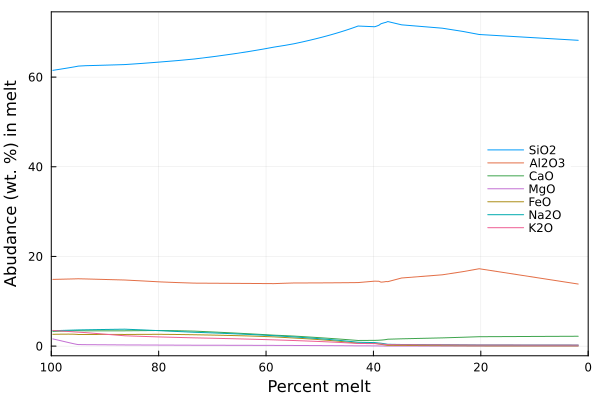

In [4]:
## --- Plot melt composition
h = plot(xlabel="Percent melt",ylabel="Abudance (wt. %) in melt")
for e in ["SiO2","Al2O3","CaO","MgO","FeO","Na2O","K2O"]
    plot!(h,melt["mass"],melt[e],label=e)
end
plot!(h,xlims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:right,xflip=true)

### Zircon saturation calculations
#### Trace element partitioning

In [5]:
# Enter trace element data
# Can include any elements you want, the only required one is zirconium (Zr)
trace = elementify([170.68,],["Zr",],skipstart=0,importas=:Dict)

Dict{String, Union{Float64, String, Vector{String}}} with 2 entries:
  "Zr"       => 170.68
  "elements" => ["Zr"]

In [6]:
# Since the mineral/melt partition coefficients we're using are averaged from GERM 
# as a function of silica (from 40-80), first figure out which coefficients we want
si_index = round.(Int, melt["SiO2"] .|> x -> isnan(x) ? 80 : x) .- 39
si_index[si_index.<1] .= 1
si_index[si_index.>40] .= 40

# Melt fraction
F = modes["liquid"] ./ (modes["liquid"] + modes["solids"])

# Use GERM partition coeffs to calculate bulk solid/melt d for each element
germ_kd["Whitlockite"] = germ_kd["Apatite"]
germ_kd["minerals"] = unique([germ_kd["minerals"]; "Whitlockite"])
d = Dict()
for e in trace["elements"]
    # Calculate bulk partition coeff.
    d[e] = zeros(size(modes["solids"]))
    for m in germ_kd["minerals"]
        for k in filter(x -> containsi(x, m), keys(modes))
            # Note that minerals that we don't have data for end up being
            # treated like all elements are incompatible in them.
            # Note, geometric mean = log average
            d[e] = nansum([d[e] modes[k]./modes["solids"] .* (10.0.^germ_kd[m][e][si_index]) ], dim=2)
        end
    end
end

# Calculate trace elements in melt as a function of melt fraction (equilibrium)
calculated = Dict()
calculated["elements"] = trace["elements"]
for e in calculated["elements"]
    calculated[e] = trace[e] ./ (d[e].*(1.0.-F) + F)
end

#### Calculate mass of zircon saturated, using Boehnke et al zircon saturation equations

In [7]:
# Some quantities we'll need to calculate M
melt["FeOT"] = melt["FeO"] + melt["Fe2O3"]/1.11
melt["MnO"] = zeros(size(melt["FeOT"]))

# The `tzircZr` function calculates how much zirconium is required to saturate zircon 
# for a given temperature and bulk composition
ZrSat = tzircZr((["SiO2", "TiO2", "Al2O3", "FeOT", "MnO", "MgO", "CaO", "Na2O", "K2O", "P2O5", "Temperature"] .|> x -> melt[x])...)
modes["zircon"] = modes["liquid"] .* max.(calculated["Zr"] - ZrSat, 0)*2.009/1_000_000
modes["elements"] = unique([modes["elements"]; "zircon"])
modes["solids"] .+= modes["zircon"];
modes["liquid"] .-= modes["zircon"];

#### Plot results

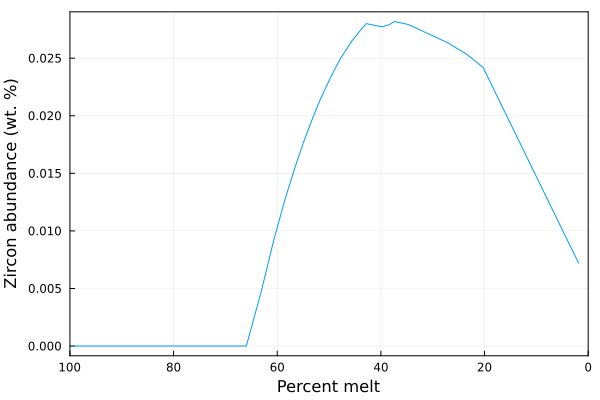

In [8]:
h = plot(xlabel="Percent melt", ylabel="Zircon abundance (wt. %)")
plot!(h, modes["liquid"], modes["zircon"], label="")
plot!(h,xlims=(0,100),framestyle=:box,fg_color_legend=:white,legend=:right,xflip=true)